# Project

## 1. Imports

In [1]:
from nceiDatabaseConnector.nceiDatabasePackage.nceiDataManager import NCEIDataManager
from nceiDatabaseConnector.nceiDatabasePackage.nceiDatabaseManager import NCEIDatabaseManager

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. User settings

- years_in_db: An array of year Numbers that we want to download
- stationsFilePath: the path where the stations data is stored and located
- modifiedStationsFilePath: the path where the modified stations data is stored
- downloadCSVFilePath: where the csv.gz files from the ncei file server should be saved
- modifiedCSVFilePath: where the modified csv files should be saved
- dbname: the name of the database you want to connect to
- dbuser: the user that you want to connect with to the database
- dbpassword: the password for the user

In [2]:
years_in_db = [1950, 1951, 1952, 1953, 1954, 2010, 2011, 2012, 2013, 2014]
stationsFilePath = "./data/stations/"
modifiedStationsFilePath = "./data/stations/modifiedStations/"
downloadCSVFilePath = "./data/NCEI/ghcn/daily/"
modifiedCSVFilePath = "./data/NCEI/modified/daily/"
dbname = "NCEIDatabase"
dbuser = "ESDP"
dbpassword = "esdp1"
debug_messages = False
stationCols = ["id", "latitude", "longitude", "elevation", "state", "name", "gsn_flag", "hcn_crn_flag", "wmo_id"]
weatherCols = ["id", "stationcode", "datelabel", "param", "value", "mflag", "qflag", "sflag", "time"]

### 2.1 Docker setup

In [3]:
#This command writes the dbname, dbuser and dbpassword to an env file which is used by the docker-container during postgresql setup
envVariables = {
    "DATABASE_NAME": dbname,
    "DATABASE_USER": dbuser,
    "DATABASE_PASSWORD": dbpassword,
}

with open(".env", "w") as env_file:
    for key, value in envVariables.items():
        env_file.write(f"{key}={value}\n")

print(".env file created successfully.")

.env file created successfully.


#### Docker compose statements

In [4]:
#!docker-compose up -d --build
!docker-compose up -d

time="2024-07-17T19:29:52+02:00" level=warning msg="c:\\Users\\Fabi\\dev\\python\\ESDP1-Database-Project\\docker-compose.yml: `version` is obsolete"
 Container esdp1-database-project-db-1  Running


In [5]:
# run this to stop the docker container (but keep the data in the database for later)
# !docker-compose stop
# run this to stop and remove the docker container (you will loose all the data within the database and will have to set it up again)
#!docker-compose down

## 3. Create database manager

In [6]:
ncei_db = NCEIDatabaseManager(db_name=dbname, 
                         db_user=dbuser, 
                         db_password=dbpassword, 
                         db_host="localhost", 
                         db_port="5432",
                         debug_messages = True)

In [7]:
print(dir(ncei_db))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'check_year', 'connect_to_db', 'count_rows', 'create_climate_table', 'create_climate_tables', 'create_stations_table', 'db_host', 'db_name', 'db_password', 'db_port', 'db_user', 'debug_messages', 'drop_table', 'get_data_between_dates', 'get_data_between_dates_one_year', 'get_data_yearly', 'get_month_data', 'insert_copy', 'is_valid_year', 'is_year_in_db', 'multi_threaded_insert', 'split_csv_file', 'station_cols', 'weather_cols']


## 4. Create data manager

In [8]:
ncei_data = NCEIDataManager()

In [9]:
print(dir(ncei_data))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'convert_stations', 'download_stations', 'download_year', 'download_years', 'export_downloaded_year', 'export_downloaded_years']


## 5. Download Data

### 5.1 Download Stations

In [10]:
ncei_data.download_stations(file_path_dest=stationsFilePath)


Already downloaded station data.
Already downloaded station readme file.
Data (stations and readme) downloaded and saved in ./data/stations/


### 5.2 Download Climate data

In [11]:
ncei_data.download_years(array_of_years=years_in_db,
                         file_path=downloadCSVFilePath,
                         multi_thread=True, 
                         num_threads=4)

Already downloaded data for year 1950
Already downloaded data for year 1951
Already downloaded data for year 1952
Already downloaded data for year 1954
Already downloaded data for year 1953
Already downloaded data for year 2010
Already downloaded data for year 2013
Already downloaded data for year 2012
Already downloaded data for year 2011
Already downloaded data for year 2014


## 6. Export Filtered Data

In [12]:
ncei_data.export_downloaded_years(array_of_years=years_in_db, 
                                  file_path=downloadCSVFilePath, 
                                  file_path_dest=modifiedCSVFilePath, 
                                  multi_thread=True, 
                                  num_threads=4)

...Year 1950 processing...
Already exported data for year 1950.
...Year 1951 processing...
Already exported data for year 1951.
...Year 1952 processing...
...Year 1953 processing...
Already exported data for year 1952.
...Year 1954 processing...
Already exported data for year 1954.
Already exported data for year 1953.
...Year 2010 processing...
...Year 2011 processing...
...Year 2012 processing...
Already exported data for year 2010.
...Year 2013 processing...
Already exported data for year 2012.
Already exported data for year 2013.
Already exported data for year 2011.
...Year 2014 processing...
Already exported data for year 2014.


## 7. Fill Database

### 7.1 Stations

#### 7.1.1 Drop station table

In [13]:
# ncei_db.drop_table("Station")

#### 7.1.2 Create the stations table

##### Fehler hierbei
Error: connection to server at "localhost" (::1), port 5432 failed: server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.

In [14]:
# ncei_db.create_stations_table()

#### 7.1.3 Insert the station into the database

In [15]:
file_path = f"{modifiedStationsFilePath}modified_stations.csv"

# ncei_db.insert_copy(file_path, "Station", stationCols)

#### 7.1.4 Verify the data insertion

In [16]:
ncei_db.count_rows("Station")

Connected to database NCEIDatabase with user ESDP
The table Station contains 127994 rows.
Disconnected


127994

### 7.2 Climate tables

#### 7.2.1 Drop table

In [17]:
# ncei_db.drop_table("Climate1950")

#### 7.2.3 Create all tables

In [18]:
ncei_db.create_climate_tables(years=years_in_db)

Connected to database NCEIDatabase with user ESDP
Table Climate1950 created successfully.
Disconnected
Connected to database NCEIDatabase with user ESDP
Table Climate1951 created successfully.
Disconnected
Connected to database NCEIDatabase with user ESDP
Table Climate1952 created successfully.
Disconnected
Connected to database NCEIDatabase with user ESDP
Table Climate1953 created successfully.
Disconnected
Connected to database NCEIDatabase with user ESDP
Table Climate1954 created successfully.
Disconnected
Connected to database NCEIDatabase with user ESDP
Table Climate2010 created successfully.
Disconnected
Connected to database NCEIDatabase with user ESDP
Table Climate2011 created successfully.
Disconnected
Connected to database NCEIDatabase with user ESDP
Table Climate2012 created successfully.
Disconnected
Connected to database NCEIDatabase with user ESDP
Table Climate2013 created successfully.
Disconnected
Connected to database NCEIDatabase with user ESDP
Table Climate2014 creat

True

#### 7.2.4 Verify the insertion of all tables

In [19]:
for year in years_in_db:
    ncei_db.count_rows(f"Climate{year}")

Connected to database NCEIDatabase with user ESDP
The table Climate1950 contains 18503793 rows.
Disconnected
Connected to database NCEIDatabase with user ESDP
The table Climate1951 contains 19279848 rows.
Disconnected
Connected to database NCEIDatabase with user ESDP
The table Climate1952 contains 19548958 rows.
Disconnected
Connected to database NCEIDatabase with user ESDP
The table Climate1953 contains 19831198 rows.
Disconnected
Connected to database NCEIDatabase with user ESDP
The table Climate1954 contains 20216183 rows.
Disconnected
Connected to database NCEIDatabase with user ESDP
The table Climate2010 contains 27593925 rows.
Disconnected
Connected to database NCEIDatabase with user ESDP
The table Climate2011 contains 26132221 rows.
Disconnected
Connected to database NCEIDatabase with user ESDP
The table Climate2012 contains 26050070 rows.
Disconnected
Connected to database NCEIDatabase with user ESDP
The table Climate2013 contains 25090492 rows.
Disconnected
Connected to databa

#### 7.2.5 Insert the data into the database

In [20]:
for year in years_in_db:
    filePath = f"{modifiedCSVFilePath}modified_{year}.csv"

    tableName = ncei_db.create_climate_table(year=year)
    
    ncei_db.multi_threaded_insert(file_path=filePath, 
                                  table_name=tableName, 
                                  columns=weatherCols, 
                                  num_threads=4)

Connected to database NCEIDatabase with user ESDP
Table Climate1950 created successfully.
Disconnected
Connected to database NCEIDatabase with user ESDP
The table Climate1950 contains 18503793 rows.
Disconnected
Data in table Climate1950 already exists. Please check or delete the database before continuing.
Connected to database NCEIDatabase with user ESDP
Table Climate1951 created successfully.
Disconnected
Connected to database NCEIDatabase with user ESDP
The table Climate1951 contains 19279848 rows.
Disconnected
Data in table Climate1951 already exists. Please check or delete the database before continuing.
Connected to database NCEIDatabase with user ESDP
Table Climate1952 created successfully.
Disconnected
Connected to database NCEIDatabase with user ESDP
The table Climate1952 contains 19548958 rows.
Disconnected
Data in table Climate1952 already exists. Please check or delete the database before continuing.
Connected to database NCEIDatabase with user ESDP
Table Climate1953 creat

## 8. Get Data

We want to compare different parameters for the years 1950-1955 and 2010-2015.  
We have the parameters TMIN, TMAX, PRCP etc.

1. Create lineplot for a daterange (one year or days of different years)
2. Boxplot

### 8.1 Climate data

#### 8.1.1 Settings

In [43]:
start_date = "1954-01-01"
end_date = "2010-12-31"
parameters = ["TMAX", "TMIN"]
stations = ["AG000060390", "AG000060590"]
columns = ["stationcode", "datelabel", "value", "param"]

years_for_plotting = [1950, 2010]

month = 12

#### 8.1.2 Get data for lineplot

In [22]:
data_for_lineplot = ncei_db.get_data_between_dates(start_date, 
                                                   end_date, 
                                                   parameters, 
                                                   stations, 
                                                   columns)

Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase wit

In [23]:
print(data_for_lineplot.head())
print(data_for_lineplot.info())

   stationcode   datelabel      value param
0  AG000060390  1950-01-01   8.000000  TMIN
1  AG000060590  1950-01-01   3.600000  TMIN
2  AG000060590  1950-01-01  15.400001  TMAX
3  AG000060590  1950-01-02  15.600000  TMAX
4  AG000060390  1950-01-02  12.900001  TMAX
<class 'pandas.core.frame.DataFrame'>
Index: 12449 entries, 0 to 848
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   stationcode  12449 non-null  object 
 1   datelabel    12449 non-null  object 
 2   value        12449 non-null  float64
 3   param        12449 non-null  object 
dtypes: float64(1), object(3)
memory usage: 486.3+ KB
None


In [24]:
yearly_data_for_lineplot = ncei_db.get_data_yearly(years_for_plotting, 
                                                   parameters, 
                                                   stations, 
                                                   columns)



Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP

                    SELECT "stationcode", "datelabel", "value", "param" 
                    FROM "Climate1950"
                    WHERE stationcode IN ('AG000060390','AG000060590') AND 
                            param IN ('TMAX','TMIN')
                    ORDER BY datelabel                
            
The requested query returned 1459 results.
Connected to database NCEIDatabase with user ESDP

                    SELECT "stationcode", "datelabel", "value", "param" 
                    FROM "Climate2010"
                    WHERE stationcode IN ('AG000060390','AG000060590') AND 
                            param IN ('TMAX','TMIN')
                    ORDER BY datelabel                
            
The requested query returned 1127 results.


In [25]:
print(yearly_data_for_lineplot.head())
print(yearly_data_for_lineplot.info())

   stationcode   datelabel      value param
0  AG000060590  1950-01-01   3.600000  TMIN
1  AG000060390  1950-01-01   8.000000  TMIN
2  AG000060590  1950-01-01  15.400001  TMAX
3  AG000060390  1950-01-02   7.400000  TMIN
4  AG000060390  1950-01-02  12.900001  TMAX
<class 'pandas.core.frame.DataFrame'>
Index: 2586 entries, 0 to 1126
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   stationcode  2586 non-null   object 
 1   datelabel    2586 non-null   object 
 2   value        2586 non-null   float64
 3   param        2586 non-null   object 
dtypes: float64(1), object(3)
memory usage: 101.0+ KB
None


#### 8.1.3 Get data for boxplots

In [45]:
for year in years_for_plotting:
    df_get = ncei_db.get_month_data(year, month, parameters, stations, columns=columns)

    print(df_get.head())
    print(df_get.info())

Connected to database NCEIDatabase with user ESDP

                    SELECT "stationcode", "datelabel", "value", "param" 
                    FROM "Climate1950"
                    WHERE stationcode IN ('AG000060390','AG000060590') AND 
                            param IN ('TMAX','TMIN') AND
                            date_part('month', datelabel) = 12
                    ORDER BY datelabel                
            
The requested query returned 124 results.
   stationcode   datelabel  value param
0  AG000060390  1950-12-01   20.4  TMAX
1  AG000060390  1950-12-01    6.2  TMIN
2  AG000060590  1950-12-01   18.0  TMAX
3  AG000060590  1950-12-01   11.2  TMIN
4  AG000060390  1950-12-02   22.4  TMAX
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   stationcode  124 non-null    object 
 1   datelabel    124 non-null    object 
 2   value        1

## 9. Plot Data

### 9.1 Task 1 (Lineplot)

#### 9.1.1 Functions for plotting

In [31]:
def create_linepplot_between_dates(start_date, end_date, stations, parameters, columns = ["stationcode", "datelabel", "value", "param"]):
    tmp = ncei_db.get_data_between_dates(start_date, end_date, parameters, stations, columns).copy()

    # Convert datelabel to datetime format
    tmp["datelabel"] = pd.to_datetime(tmp["datelabel"])
    
    start_year = start_date[:4]
    end_year = end_date[:4]

    for parameter in parameters:
        plt.figure(figsize=(14, 8)) 

        if start_year == end_year and ncei_db.check_year(end_year):
            df_per_year = tmp[(tmp["datelabel"].dt.year == int(start_year)) & (tmp["param"] == parameter)].copy()

            sns.lineplot(x="datelabel", y="value", style=start_year, data=df_per_year, errorbar=("ci", 1))

            plt.title(f"{start_year} - {parameter}")
            
        else: 
            years_to_plot = np.arange(int(start_year), int(end_year)+1, 1)

            filtered_years = [year for year in years_to_plot if ncei_db.check_year(year)]

            for year in filtered_years:
                df_per_year = tmp[(tmp["datelabel"].dt.year == year) & (tmp["param"] == parameter)].copy()
                df_per_year.loc[:, "day"] = df_per_year.loc[:, "datelabel"].dt.strftime("%m-%d")

                sns.lineplot(x="day", y="value", style=year, data=df_per_year, errorbar=("ci", 1))

                unique_months = df_per_year["day"].str[:2].unique()
                month_labels = [f"{i:02d}-01" for i in range(1, 13)]
                plt.xticks(ticks=month_labels, labels=pd.to_datetime(month_labels, format="%m-%d").strftime("%b"))
                plt.ylim(df_per_year["value"].min()-5, df_per_year["value"].max()+5)
                
        plt.title(f"Yearly comparison of parameter: {parameter}")
        plt.xlabel("Date")
        plt.ylabel(f"{parameter}")
        # plt.ylim(0, None) 
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

In [34]:
def create_linepplot_years(years, stations, parameters, columns = ["stationcode", "datelabel", "value", "param"]):
    tmp = ncei_db.get_data_yearly(years, parameters, stations, columns)

    # Convert datelabel to datetime format
    tmp["datelabel"] = pd.to_datetime(tmp["datelabel"])

    for parameter in parameters:
        plt.figure(figsize=(14, 8)) 

        filtered_years = [year for year in years if ncei_db.check_year(year)]

        for year in filtered_years:
            df_per_year = tmp[(tmp["datelabel"].dt.year == year) & (tmp["param"] == parameter)].copy()
            df_per_year = df_per_year.copy()
            # df_per_year.loc[:, "day"] = df_per_year["datelabel"].dt.strftime("%m-%d") 
            df_per_year.loc[:, "day"] = df_per_year.loc[:, "datelabel"].dt.strftime("%m-%d")

            sns.lineplot(x="day", y="value", style=year, data=df_per_year, errorbar=("ci", 1))

            unique_months = df_per_year["day"].str[:2].unique()
            month_labels = [f"{i:02d}-01" for i in range(1, 13)]

            plt.xticks(ticks=month_labels, labels=pd.to_datetime(month_labels, format="%m-%d").strftime("%b"))
            plt.ylim(df_per_year["value"].min()-5, df_per_year["value"].max()+5)
                
        plt.title(f"Yearly comparison of parameter: {parameter}")
        plt.xlabel("Date")
        plt.ylabel(f"{parameter}")
        # plt.ylim(0, None) 
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

In [38]:
def create_boxplot_monthly_comparison(years, month, stations, parameters, columns = ["stationcode", "datelabel", "value", "param"]):
    for station in stations:
        fig, axes = plt.subplots(len(parameters), len(years), figsize=(15, 10), sharey="row")
        
        if len(parameters) == 1:
            axes = np.array([axes])

        for i, parameter in enumerate(parameters):
            for j, year in enumerate(years):
                ax = axes[i, j]

                df_get = ncei_db.get_month_data(year, month, parameters=[parameter], stations=[station], columns=columns)

                if not df_get.empty:
                    sns.boxplot(x="stationcode", y="value", data=df_get, ax=ax, hue="param", dodge=True)

                    # Set plot labels and title
                    ax.set_title(f"{parameter} | {year}-{month} | {len(df_get)} values in DB")
                    ax.set_xlabel("Station Code")
                    ax.set_ylabel(f"Value of parameter {parameter}")
                    ax.set_ylim(df_get["value"].min()-10, df_get["value"].max()+10)
                    ax.grid()

        plt.suptitle(f"Comparison of station {station} through multiple years.")
        
        # Adjust layout
        plt.tight_layout(rect=[0, 0, 1, 0.96])  

        # Show plot
        plt.show()



#### 9.1.2 Plot the data

In [37]:
# create_linepplot_between_dates(start_date, end_date, stations, parameters)

Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP

                    SELECT "stationcode", "datelabel", "value", "param" 
                    FROM "Climate1950"
                    WHERE stationcode IN ('AG000060390','AG000060590') AND 
                            param IN ('TMAX','TMIN')
                    ORDER BY datelabel                
            
The requested query returned 1459 results.
Connected to database NCEIDatabase with user ESDP

                    SELECT "stationcode", "datelabel", "value", "param" 
                    FROM "Climate2012"
                    WHERE stationcode IN ('AG000060390','AG000060590') AND 
                            param IN ('TMAX','TMIN')
                    ORDER BY datelabel                
            
The requested q

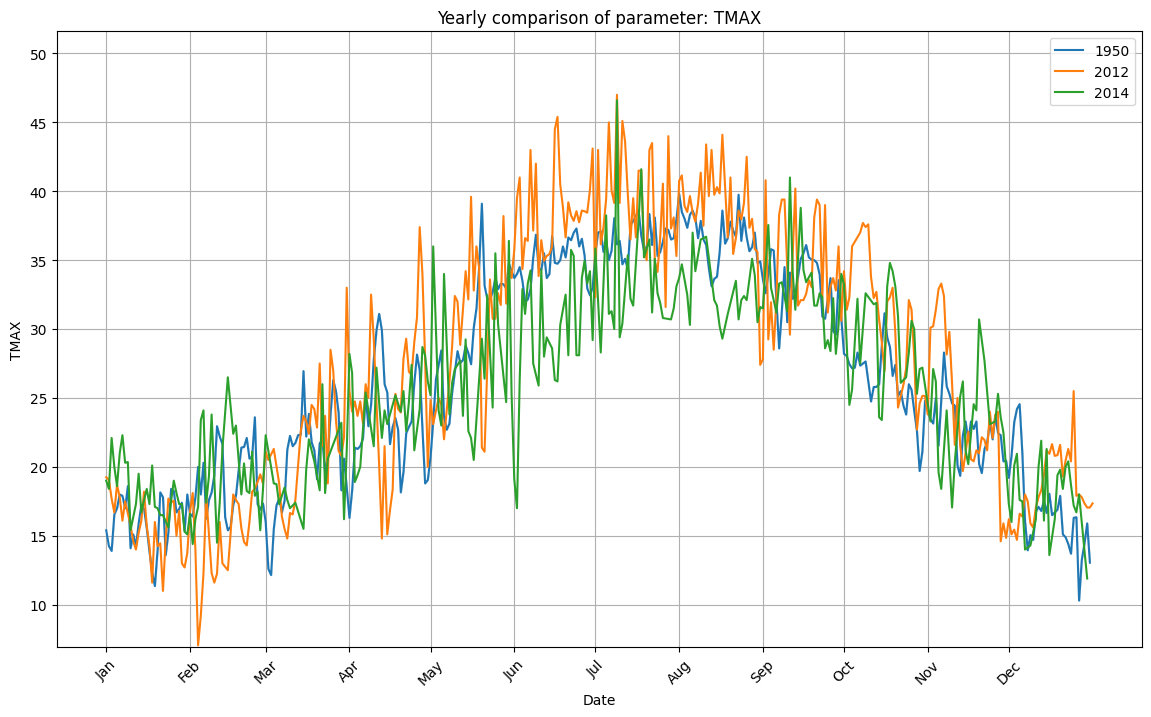

Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.
Connected to database NCEIDatabase with user ESDP
Connection established.


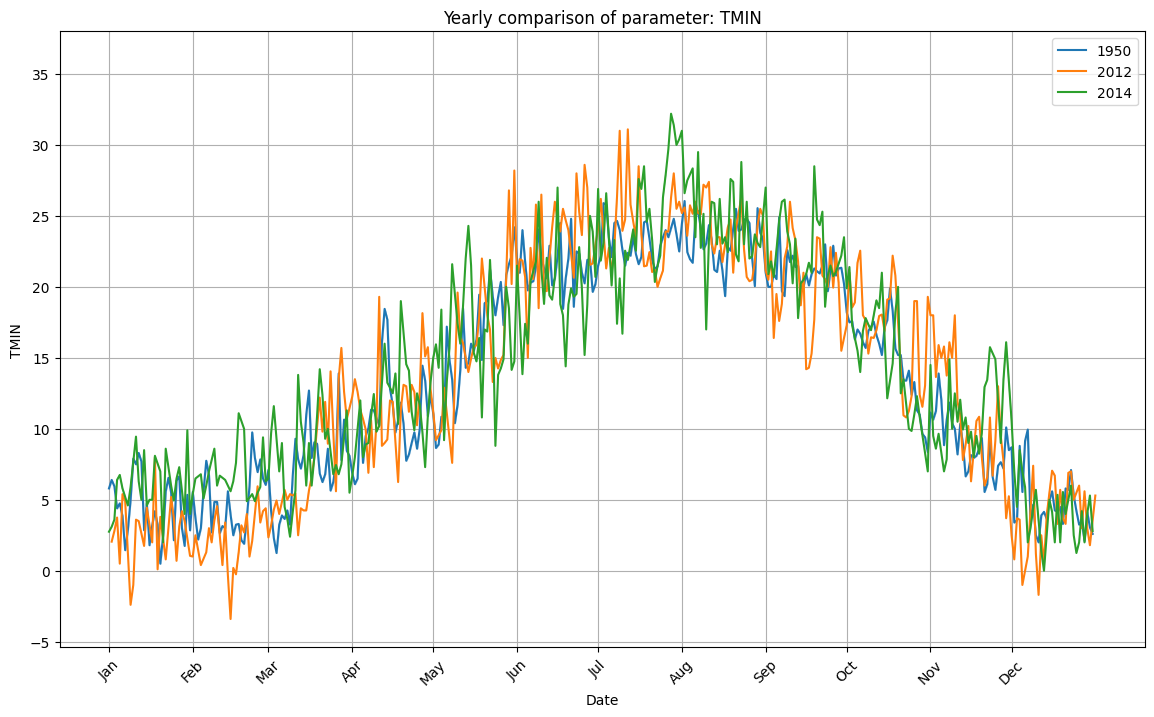

In [35]:
create_linepplot_years([1950, 2012, 2014], stations, parameters)

#### 9.1.3 Plot Monthly difference

Connected to database NCEIDatabase with user ESDP

                    SELECT "stationcode", "datelabel", "value", "param" 
                    FROM "Climate1950"
                    WHERE stationcode IN ('AG000060390') AND 
                            param IN ('TMAX') AND
                            date_part('month', datelabel) = 12
                    ORDER BY datelabel                
            
The requested query returned 31 results.
Connected to database NCEIDatabase with user ESDP

                    SELECT "stationcode", "datelabel", "value", "param" 
                    FROM "Climate2010"
                    WHERE stationcode IN ('AG000060390') AND 
                            param IN ('TMAX') AND
                            date_part('month', datelabel) = 12
                    ORDER BY datelabel                
            
The requested query returned 23 results.
Connected to database NCEIDatabase with user ESDP

                    SELECT "stationcode", "datelabel", 

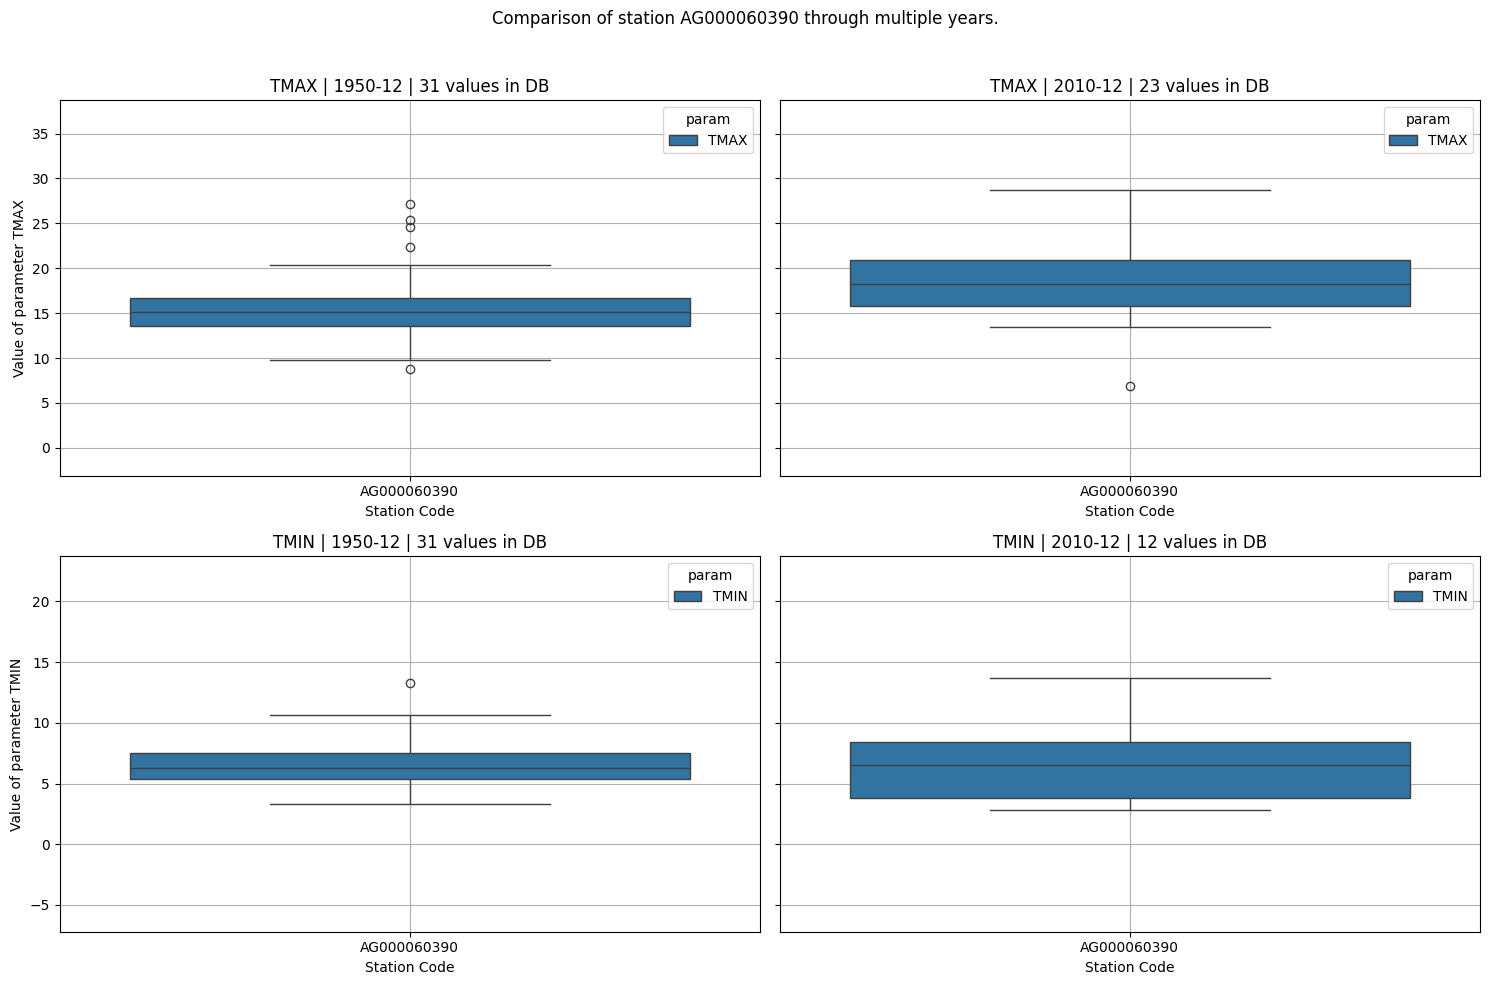

Connected to database NCEIDatabase with user ESDP

                    SELECT "stationcode", "datelabel", "value", "param" 
                    FROM "Climate1950"
                    WHERE stationcode IN ('AG000060590') AND 
                            param IN ('TMAX') AND
                            date_part('month', datelabel) = 12
                    ORDER BY datelabel                
            
The requested query returned 31 results.
Connected to database NCEIDatabase with user ESDP

                    SELECT "stationcode", "datelabel", "value", "param" 
                    FROM "Climate2010"
                    WHERE stationcode IN ('AG000060590') AND 
                            param IN ('TMAX') AND
                            date_part('month', datelabel) = 12
                    ORDER BY datelabel                
            
The requested query returned 30 results.
Connected to database NCEIDatabase with user ESDP

                    SELECT "stationcode", "datelabel", 

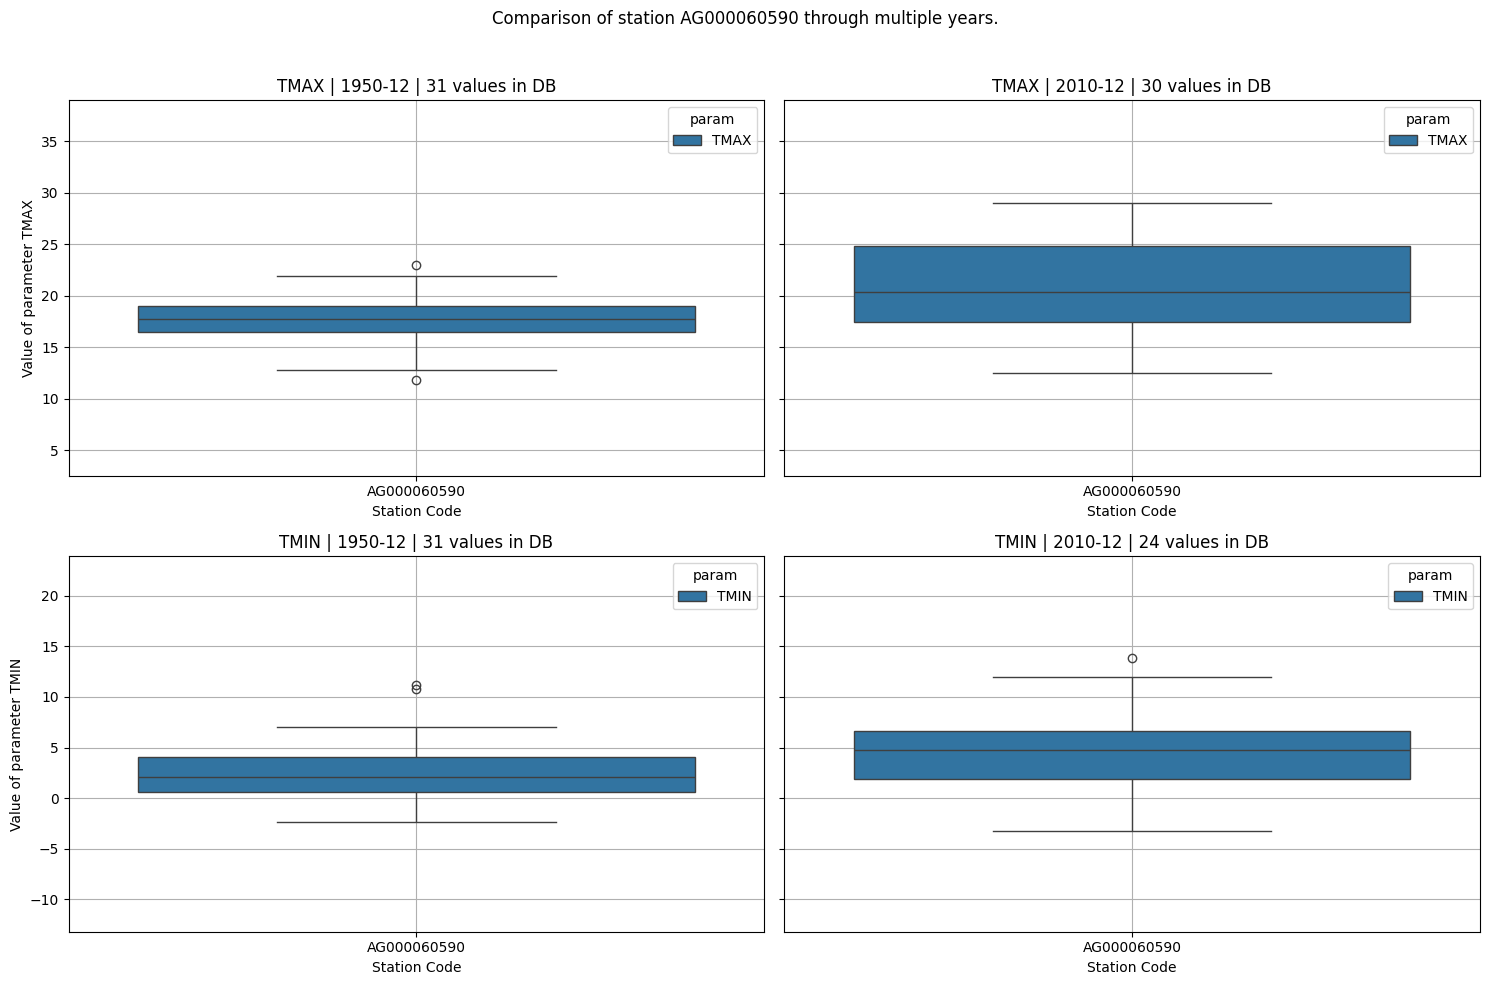

In [42]:
create_boxplot_monthly_comparison(years_for_plotting, month, stations, parameters)